In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.datasets import make_regression 

# generate some synthetic dataset
# generate some synthetic dataset
x, y = make_regression(n_samples=30, n_features=1, noise=30, random_state=1) # generate data using the imported "make_regression" function
y    = y + 10*np.ones(30).reshape(y.shape) # add a 10* identity matrix to data
x    = x + 10*np.ones(30).reshape(x.shape) # add a 10* identity matrix to data
y    = y.reshape(-1,1)

# create Linear Regression model using an intercept term 
reg_intercept = linear_model.LinearRegression(fit_intercept=True) 
# fit a linear regression model (with intercept)
reg_intercept = reg_intercept.fit(x, y) 

In [2]:
# choose random initial weight value w and intercept c
w = np.array([-300])
c = np.array([-100])

lrate = 0.001  # The learning Rate
epochs = 5000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

MSE    = []
Ws     = [w]
Cs     = [c]
y_pred = []
MSEw   = []
MSEc   = []
Gradw  = [np.array([0])]
Gradc  = [np.array([0])]

# Performing Gradient Descent 
for i in range(epochs): 
    y_hat     = w*x+c  # The current predicted value of Y 
    mse       = sum((y - y_hat)**2)/n # MSE Loss function
    mse_w     = (-2/n) * sum(x * (y - y_hat))  # Derivative of MSE Loss function wrt w
    mse_c     = (-2/n) * sum(y - y_hat)  # Derivative of MSE Loss function wrt c 
    gradientw = lrate* mse_w
    gradientc = lrate* mse_c
    w         = w - gradientw  # Update weight
    c         = c - gradientc  # Update intercept
    
    y_pred.append(y_hat)
    MSE.append(mse) 
    MSEw.append(mse_w)
    Gradw.append(gradientw)
    Gradc.append(gradientc)
    Ws.append(w)
    Cs.append(c)
print(w,c)    

[11.35816507] [-98.99291907]


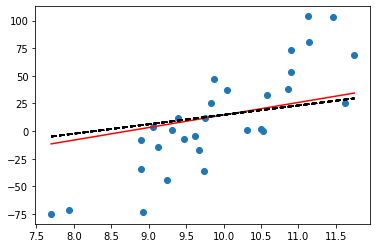

In [3]:
plt.scatter(x, y) 
x_coord = [x.min(), x.max()]
y_coord = [y_hat[np.argmin(x)], y_hat[np.argmax(x)]]
plt.plot(x_coord, y_coord, color='red')  # regression line
for el in y_pred[200:220]:
    plt.plot(x_coord,[el[np.argmin(x)], el[np.argmax(x)]], color='k', ls='--')
plt.show()

In [4]:
w = np.linspace(-300,300,100)
c = np.linspace(-400,400,100)
mse_vals = np.zeros((len(w), len(c)))
print(mse_vals.shape)
                    
for i, value1 in enumerate(w):
    for j, value2 in enumerate(c):
        y_hat = value1*x + value2        
        mse_vals[i, j] = sum((y - y_hat)**2)/n

(100, 100)


In [5]:
C, W = np.meshgrid(c, w)

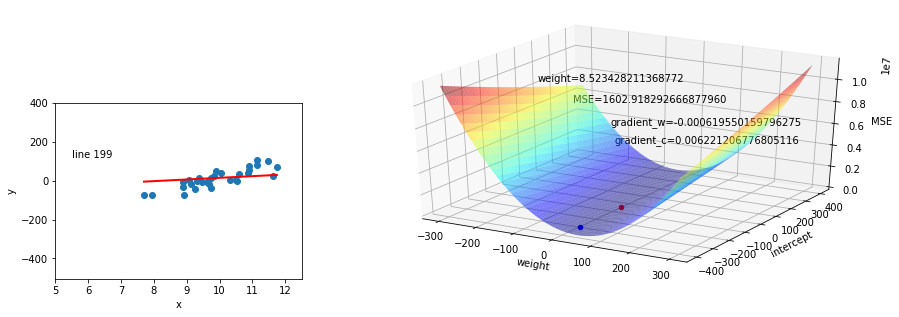

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# First set up the figure, the axis, and the plot element we want to animate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np

# coordinates for plotting linear predictors with different weight
x_coord = [x.min(), x.max()]
y_coord = []
for el in y_pred:
    y_coord.append([el[np.argmin(x)], el[np.argmax(x)]])  

# coeff from build-in regression model
idealw = reg_intercept.coef_
idealc = reg_intercept.intercept_
idealMSE = sum((y - idealw*x+idealc)**2)/n   

fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[1:, 0])
ax1.scatter(x, y) # plot data points
ax1.set_xlim(5, 12.5)
ax1.set_ylim(-4000, 400)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
text   = ax1.text(5.5, 120, 'line 0')
line1, = ax1.plot(x_coord, y_coord[0], 'r-', linewidth=2) # plot linear predictor function

ax2 = fig.add_subplot(gs[:,1:], projection='3d')
ax2.scatter(idealw, idealc, idealMSE, color='b')
sc = ax2.scatter(Ws[0], Cs[0], MSE[0], color='r')
ax2.plot_surface(W,C,mse_vals, alpha=0.5,cmap=cm.jet)
ax2.set_zlim3d(0, mse_vals.max())
ax2.set_xlabel('weight')
ax2.set_ylabel('intercept')
ax2.set_zlabel('MSE')
text1  = ax2.text(-800, 1200,0.4,  'weight={:.15f}'.format(Ws[0][0]))
text2  = ax2.text(-600, 1000,0.4, 'MSE={:.15f}'.format(Cs[0][0]))
text3  = ax2.text(-400, 800,0.4, 'gradient_w={}'.format(Gradw[0][0]))
text4  = ax2.text(-300, 600,0.4, 'gradient_c={}'.format(Gradc[0][0]))

# animation function.  This is called sequentially
def animate(i): 
    ax1.set_ylim(y_coord[i][0][0]-500, 400)
    text.set_text('line '+str(i))
    line1.set_data(x_coord, y_coord[i])
    
    sc._offsets3d = (Ws[i], Cs[i], MSE[i])  
    text1.set_text('weight={:.15f}'.format(Ws[i][0]))
    text2.set_text('MSE={:.15f}'.format(MSE[i][0]))
    text3.set_text('gradient_w={}'.format(Gradw[i][0]))
    text4.set_text('gradient_c={}'.format(Gradc[i][0]))
    return line1, sc,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, 
                               frames=200, interval=20, blit=True)


anim.save('MSE_gradDesc_Int.mp4', fps=10)
plt.show()